Diamond square algorithm attempt 1:

[[-0.18254088  0.11479893  0.46096256  0.22105805  0.13666898]
 [ 1.07283229  0.44045183  0.95321436  0.44001935 -0.23500411]
 [ 0.17860935  0.3762721   0.13762338  0.24980558 -0.14233043]
 [ 1.26309228  0.51724449  0.89889118  0.33275067 -0.31575679]
 [ 0.31144644  0.97874344  0.27414588  0.83973161 -0.10558906]]
[[0.95321436]
 [0.89889118]]
[[0.3762721  0.24980558]]
[[0.17860935 0.13762338]]


array([[0.44045183],
       [0.51724449]])

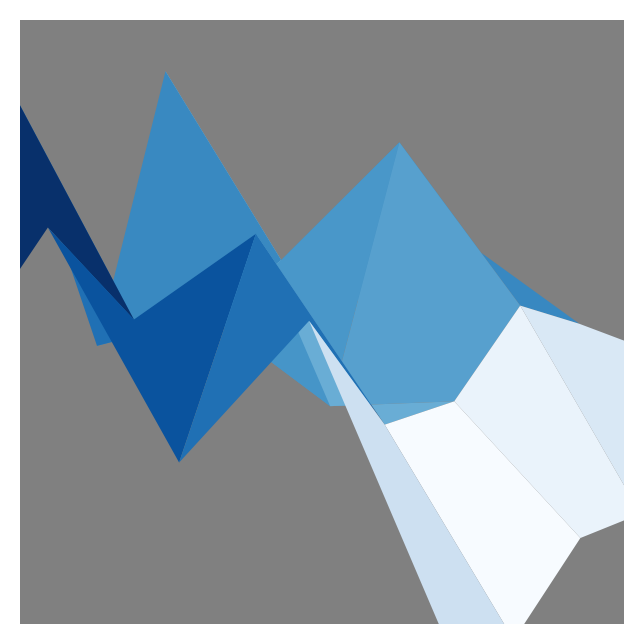

In [634]:
import random
import numpy as np
import matplotlib.pyplot as plt
# using the diamond-square algorithm:
# the dimensions of z have to be (2^n + 1, 2^n + 1)
# n = the number of iterations we will have to do for the 

np.random.seed(0)
iterations = 2
pixels = 2 ** iterations + 1
z = np.zeros((pixels, pixels))

# i need to streamline this... so inefficient yuck

def random_uniform(): # alter the range of the uniform to change the roughness of the terrain
    return 2 ** (-random.uniform(0.8, 1))
def rand(iter):
    return random.uniform(-0.5, 0.5) * random_uniform() ** iter

# initialisation - randomised
z[0][0] = rand(0)
z[pixels - 1][0] = rand(0)
z[0][pixels - 1] = rand(0)
z[pixels - 1][pixels - 1] = rand(0)


for iter in range(iterations):
    step = 2 ** (iterations - iter - 1)
    # diamond step
    
    '''
    # this is the iterative method using a for loop
    for i in range(0, pixels - 1, step * 2):
        for j in range(0, pixels - 1, step * 2):

            z[i + step][j + step] = (z[i][j] + z[i + step*2][j] + z[i][j + step*2] + z[i + step*2][j + step*2])/4 + rand(iter)
    '''
    # vectorising the steps
    z00 = z[:pixels - step * 2:step * 2, :pixels - step * 2:step * 2]
    z10 = z[:pixels - step * 2:step * 2, step * 2::step * 2]
    z01 = z[step * 2::step * 2, :pixels - step * 2:step * 2]
    z11 = z[step * 2::step * 2, step * 2::step * 2]
    z[step::step * 2, step::step * 2] = (z00 + z10 + z01 + z11)/4 + k * np.random.uniform(-1, 1)
    '''
    # square step
    for i in range(pixels):
        for j in range(pixels):
            # we need a better condition...
            # if i % step == 0 and j % step == 0
            if z[i][j] == 0 and i % step == 0 and j % step == 0:
                # at the edges, there are only three neighbouring points
                if i == 0:
                    z[i][j] = (z[i][j - step] + z[i][j + step] + z[i + step][j])/3 + rand(iter)
                elif i == pixels - 1:
                    z[i][j] = (z[i][j - step] + z[i][j + step] + z[i - step][j])/3 + rand(iter)
                elif j == 0:
                    z[i][j] = (z[i][j + step] + z[i - step][j] + z[i + step][j])/3 + rand(iter)
                elif j == pixels - 1:
                    z[i][j] = (z[i][j - step] + z[i - step][j] + z[i + step][j])/3 + rand(iter)
                else:
                    z[i][j] = (z[i][j - step] + z[i][j + step] + z[i - step][j] + z[i + step][j])/4 + rand(iter)
   '''
    
    # tackling the edges: each starting variable represents one edge
    z_row_edge0 = z[0, step::step * 2]
    z_row_edge1 = z[-1, step::step * 2]
    z_column_edge0 = z[step::step * 2, 0]
    z_column_edge1 = z[step::step * 2, -1]

    z[0, step::step * 2] = (z[0, :- step * 2:step * 2] + z[0, step * 2::step * 2] + z[step, step::step * 2])/3 + np.random.uniform(-1, 1)
    z[-1, step::step * 2] = (z[-1, :- step * 2:step * 2] + z[-1, step * 2::step * 2] + z[-step, step::step * 2])/3 + np.random.uniform(-1, 1)
    z[step::step * 2, 0] = (z[:-step * 2: step * 2, 0] + z[step * 2:: step * 2, 0] + z[step::step * 2, step])/3 + np.random.uniform(-1, 1)
    z[step::step * 2, -1] = (z[:-step * 2: step * 2, -1] + z[step * 2:: step * 2, -1] + z[step::step * 2, -step])/3 + np.random.uniform(-1, 1)


    # tackling the non-edges:
    # z0 is the odd row values that needs to be filled that is not the edge
    # z1 is the odd column values that needs to be filled that is not on the edge
    if iter != 0:
        z_row = z[step::step * 2, ::step * 2][:,1:-1]
        z_column = z[::step * 2, step::step * 2][1:-1]

        # the 4 points surrounding the odd row values that is not the edge
        pr0 = z[:-step * 2: step * 2, step * 2:-step * 2:step * 2]
        pr1 = z[step * 2:: step * 2, step * 2:-step * 2:step * 2]
        pr2 = z[step::step * 2, step::step * 2][:, 0].reshape(2 ** iter, 1)
        pr3 = z[step::step * 2, step::step * 2][:, 1].reshape(2 ** iter, 1)

        z[step::step * 2, ::step * 2][:,1:-1] = (pr0 + pr1 + pr2 + pr3)/4 + np.random.uniform(-1, 1)


        # the 4 points surrounding the odd column values that is not the edge
        pz0 = z[step::step * 2, step::step * 2][0]
        pz1 = z[step::step * 2, step::step * 2][1]
        pz2 = z[step * 2:-step * 2:step * 2, : -step * 2:step * 2]
        pz3 = z[step * 2:-step * 2:step * 2, step * 2::step * 2]

        z[::step * 2, step::step * 2][1:-1] = (pz0 + pz1 + pz2 + pz3)/4 + np.random.uniform(-1, 1)


x, y = np.mgrid[0:pixels, 0:pixels]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.set_facecolor('grey')
ax.axis('off')
ax.view_init(20, 30)
ax.plot_surface(x, y, z, cmap = 'Blues')
ax.dist = 6

print(z)
print(z[step::step * 2, ::step * 2][:,1:-1])
print(z[::step * 2, step::step * 2][1:-1])
print(z[step * 2:-step * 2:step * 2, : -step * 2:step * 2])
z[step::step * 2, step: - step * 3:step * 2]



In [636]:
# non-vectorised part from the diamond_square_algo function: old
# square step: non-vectorised version
        '''
        for i in range(0, pixels, step):
            for j in range(0, pixels, step):
                # we need a better condition...
                if array[i][j] == 0:
                    # at the edges, there are only three neighbouring points: a bit ugly but it does the job...
                    if i == 0:
                        array[i][j] = (array[i][j - step] + array[i][j + step] + array[i + step][j])/3 + k * randomiser()
                    elif i == pixels - 1:
                        array[i][j] = (array[i][j - step] + array[i][j + step] + array[i - step][j])/3 + k * randomiser()
                    elif j == 0:
                        array[i][j] = (array[i][j + step] + array[i - step][j] + array[i + step][j])/3 + k * randomiser()
                    elif j == pixels - 1:
                        array[i][j] = (array[i][j - step] + array[i - step][j] + array[i + step][j])/3 + k * randomiser()
                    else:
                        array[i][j] = (array[i][j - step] + array[i][j + step] + array[i - step][j] + array[i + step][j])/4 + k * randomiser()
        '''

IndentationError: unexpected indent (3961096145.py, line 3)

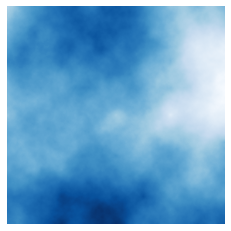

In [46]:
# an alternative notation I found on github

import numpy as np
import matplotlib.pyplot as plt

# Create a cloud-like image based on noise generated by the "diamond-square"
# algorithm. The maths behind this code is described in the scipython blog
# article at
# https://scipython.com/blog/cloud-images-using-the-diamond-square-algorithm/
# Christian Hill, March 2016.

# The array must be square with edge length 2**n + 1
n = 10
N = 2**n + 1
# f scales the random numbers at each stage of the algorithm
f = 1.0

# Initialise the array with random numbers at its corners
arr = np.zeros((N, N))
arr[0::N-1,0::N-1] = np.random.uniform(-1, 1, (2,2))
side = N-1

nsquares = 1
while side > 1:
    sideo2 = side // 2

    # Diamond step
    for ix in range(nsquares):
        for iy in range(nsquares):
            x0, x1, y0, y1 = ix*side, (ix+1)*side, iy*side, (iy+1)*side
            xc, yc = x0 + sideo2, y0 + sideo2
            # Set this pixel to the mean of its "diamond" neighbours plus
            # a random offset.
            arr[yc,xc] = (arr[y0,x0] + arr[y0,x1] + arr[y1,x0] + arr[y1,x1])/4
            arr[yc,xc] += f * np.random.uniform(-1,1)

    # Square step: NB don't do this step until the pixels from the preceding
    # diamond step have been set.
    for iy in range(2*nsquares+1):
        yc = sideo2 * iy
        for ix in range(nsquares+1):
            xc = side * ix + sideo2 * (1 - iy % 2)
            if not (0 <= xc < N and 0 <= yc < N):
                continue
            tot, ntot = 0., 0
            # Set this pixel to the mean of its "square" neighbours plus
            # a random offset. At the edges, it has only three neighbours
            for (dx, dy) in ((-1,0), (1,0), (0,-1), (0,1)):
                xs, ys = xc + dx*sideo2, yc + dy*sideo2
                if not (0 <= xs < N and 0 <= ys < N):
                    continue
                else:
                    tot += arr[ys, xs]
                    ntot += 1
            arr[yc, xc] += tot / ntot + f * np.random.uniform(-1,1)
    side = sideo2
    nsquares *= 2
    f /= 2

plt.imshow(arr, cmap=plt.cm.Blues)
plt.axis('off')
plt.savefig('cloud.png')

## Another example I found on github

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.98425197, -0.98425197, -0.98425197, ..., -0.98425197,
        -0.98425197, -0.98425197],
       [-0.96850394, -0.96850394, -0.96850394, ..., -0.96850394,
        -0.96850394, -0.96850394],
       ...,
       [ 0.96850394,  0.96850394,  0.96850394, ...,  0.96850394,
         0.96850394,  0.96850394],
       [ 0.98425197,  0.98425197,  0.98425197, ...,  0.98425197,
         0.98425197,  0.98425197],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

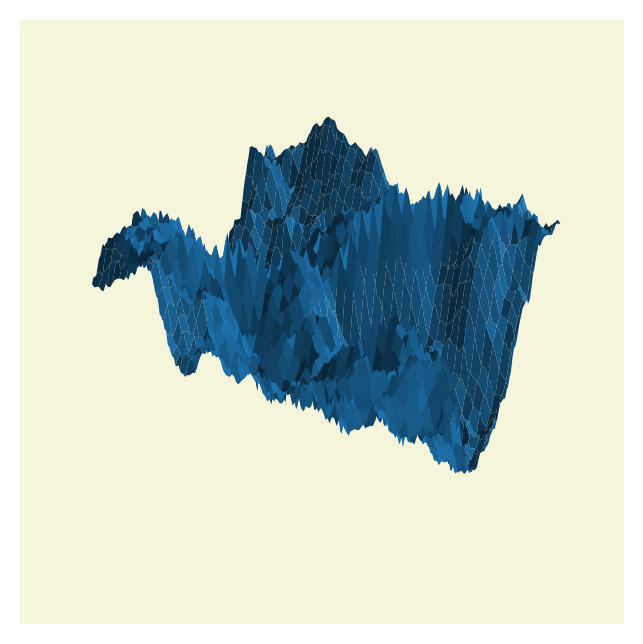

In [280]:
import random
import numpy as np
import matplotlib.pyplot as plt
levels = 8
size = 2 ** (levels - 1)
height  = np.zeros((size, size))

for lev in range(levels):
  step = size // 2 ** lev
  for y in range(0, size + 1, step):
    jumpover = 1 - (y // step) % 2 if lev > 0 else 0
    for x in range(step * jumpover, size + 1, step * (1 + jumpover)):
      pointer = 1 - (x // step) % 2 + 2 * jumpover if lev > 0 else 3
      yref, xref = step * (1 - pointer // 2), step * (1 - pointer % 2)
      corner1 = height[y - yref - 1, x - xref - 1]
      corner2 = height[y + yref - 1, x + xref - 1]
      average = (corner1 + corner2) / 2.0
      variation = step * (random.random() - 0.5)
      height[y - 1,x - 1] = average + variation if lev > 0 else 0

xg, yg = np.mgrid[-1:1:1j*size,-1:1:1j*size]


fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.set_facecolor('beige')
ax.axis('off')
ax.plot_surface(xg, yg, height)
xg

## test

In [44]:
np.random.seed(0)
iterations = 2
pixels = 2 ** iterations + 1
array = np.zeros((pixels, pixels))
k = 1
array[0][0] = np.random.uniform(-1, 1)
array[-1][0] = np.random.uniform(-1, 1)
array[0][-1] = np.random.uniform(-1, 1)
array[-1][-1] = np.random.uniform(-1, 1)

for iter in range(1, iterations + 1):
    num_points = 1
    step = int((pixels - 1) / (2 * iter))
    two_steps = step*2
    # diamond step
    for x in range(num_points):
        for y in range(num_points):
            # x0, x1, y0, y1 are the 4 neighbouring coordinate points
            x0, x1, y0, y1 = x * two_steps, (x + 1) * two_steps, y * two_steps, (y + 1) * two_steps
            print('hello')
            # X, Y are the coordinates for the point in the middle
            X, Y = x0 + step, y0 + step
            array[X][Y] = (array[x0][y0] + array[x0][y1] + array[x1][y0] + array[x1][y1])/4 + k * np.random.uniform(-1, 1)
    # multplied by 2 because the number of points of the diamond step follows the sequence 1, 4, 16, 64... and we have two for loops for each axis.
    num_points = num_points * 2
array
num_points = 1
num_points = num_points * 2
for i in range(1, 3):
    print(i)
array


hello
hello
1
2


array([[0.09762701, 0.        , 0.        , 0.        , 0.20552675],
       [0.        , 0.32947856, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.05313431, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.43037873, 0.        , 0.        , 0.        , 0.08976637]])

In [ ]:
def diamond_square(iterations = 4):
    '''
    returns a 2d numpy array, z, using the diamond square algorithm.
    the dimensions of z have to be (2^n + 1, 2^n + 1) where n in the number of iterations

    parameter:
    iterations: the number of iterations (this determines the size of the numpy array)å
    '''
    pixels = 2 ** iterations + 1
    array = np.zeros((pixels, pixels))
    k = 1

    # random initialisation of the 4 points
    array[0][0] = np.random.uniform(-1, 1)
    array[-1][0] = np.random.uniform(-1, 1)
    array[0][-1] = np.random.uniform(-1, 1)
    array[-1][-1] = np.random.uniform(-1, 1)



    for iter in range(1, iterations):
        num_points = 1
        step = int((pixels - 1) / (2 * iter))
        two_steps = step*2
        # diamond step
        for x in range(num_points):
            for y in range(num_points):
                # x0, x1, y0, y1 are the 4 neighbouring coordinate points
                x0, x1, y0, y1 = x * two_steps, (x + 1) * two_steps, y * two_steps, (y + 1) * two_steps
                # X, Y are the coordinates for the point in the middle
                X, Y = x0 + step, y0 + step
                array[X, Y] = (array[y0, x0] + array[y0, x1] + array[y1, x0] + array[y1, x1])/4 + k * np.random.uniform(-1, 1)
        # multplied by 2 because the number of points of the diamond step follows the sequence 1, 4, 16, 64... and we have two for loops for each axis.
        step = 2 ** (iterations - iter - 1)

        # square step
        for x in range(2 * num_points + 1):
            X = x * step
            for y in range(num_points + 1):
                Y = two_steps * y + step * (1 - x % 2)
                if not (0 <= x < pixels and 0 <= y < pixels):
                    continue
                tot, ntot = 0., 0
                # Set this pixel to the mean of its "square" neighbours plus
                # a random offset. At the edges, it has only three neighbours
                for (dx, dy) in ((-1,0), (1,0), (0,-1), (0,1)):
                    xs, ys = x + dx * step, y + dy*step
                    if not (0 <= xs < pixels and 0 <= ys < pixels):
                        continue
                    else:
                        tot += array[ys, xs]
                        ntot += 1
                array[X, Y] += tot / ntot + k * np.random.uniform(-1,1)
        
        num_points *= 2
        k /= 2

    return array, pixels


In [53]:
np.random.normal(0, 1)

-1.0979178089803872

## Classic noise:

In [180]:
import numpy as np
# determine the shape of the grid:
# if grid_shape = 3, there are going to be 9 coordinate points.
grid_shape = 3
num_coordinates = grid_shape ** 2
# the total number of pixels in the array = pixels * pixels
# the number of pixels has to be a multiple of the grid_shape
num_pixels_per_coordinate = 3
pixels = (grid_shape - 1) * num_pixels_per_coordinate + 1
array = np.zeros((pixels, pixels))
# we are going to have to randomise the vectors of the coordinate points
# we either randomise it or we randomly choose from 8 or 16 vectors.
# these vectors will have to have a length 1
# we are going to have standardise it
np.random.seed(0)
# standardising the vector arrays so that it is length 1
vector_array = np.random.uniform(-1, 1, (num_coordinates, 2))
length_array = ((vector_array[:, 0] ** 2 + vector_array[:, 1] ** 2) ** (1/2)).reshape(num_coordinates, 1)
vector_array_standardised = (vector_array / length_array).reshape(3, 3, 2)
# full_vector_array = np.full((pixels, pixels, 2), vector_array_standardised)
# full_vector_array[::num_pixels_per_coordinate, ::num_pixels_per_coordinate] =  vector_array_standardised.reshape(3, 3, 2)


# maybe we're going to need np.where...? we need to get the position of each coordinate
# a possible method is to get a grid that gives the coordinate of each point -
# the same we did for the mandelbrot set


x, y = np.mgrid[0:pixels, 0:pixels] / num_pixels_per_coordinate
i = np.floor(x_index/grid_shape).copy()
j = np.floor(y_index/grid_shape).copy()

u = x - i
v = y - j

# n_0 = np.dot(full_vector_array[i, j], [u, v])
# full_vector_array[i, j]


IndexError: arrays used as indices must be of integer (or boolean) type

## Classic Noise attempt 2:

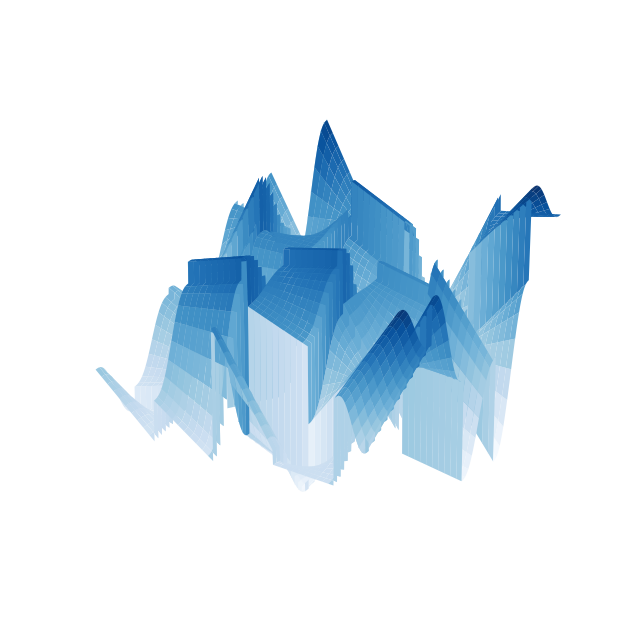

In [329]:
x_integers = 6
y_integers = 6
num_pixels_per_integer = 150
x_pixels = (x_integers - 1) * num_pixels_per_integer + 1
y_pixels = (y_integers - 1) * num_pixels_per_integer + 1

array = np.zeros((x_pixels, y_pixels))

# vector array
np.random.seed(5)
'''vector_array = np.random.uniform(-1, 1, (x_integers * y_integers, 2))
length_array = ((vector_array[:, 0] ** 2 + vector_array[:, 1] ** 2) ** (1/2)).reshape(x_integers * y_integers, 1)
v_standard = (vector_array / length_array).reshape(x_integers, y_integers, 2)'''
v_standard = 

# x and y coordinates
x_index, y_index = np.mgrid[0:x_pixels, 0:y_pixels]
x, y = np.mgrid[0:x_pixels, 0:y_pixels] / num_pixels_per_integer
i, j = np.floor(x).copy(), np.floor(y).copy()
u, v = x - i, y - j
u_v_reshaped_1 = np.concatenate((u.reshape(x_pixels * y_pixels, 1), v.reshape(x_pixels * y_pixels, 1)), axis = 1).reshape(x_pixels, y_pixels, 2)
u_v_reshaped_2 = np.concatenate(((u-1).reshape(x_pixels * y_pixels, 1), v.reshape(x_pixels * y_pixels, 1)), axis = 1).reshape(x_pixels, y_pixels, 2)
u_v_reshaped_3 = np.concatenate((u.reshape(x_pixels * y_pixels, 1), (v-1).reshape(x_pixels * y_pixels, 1)), axis = 1).reshape(x_pixels, y_pixels, 2)
u_v_reshaped_4 = np.concatenate(((u-1).reshape(x_pixels * y_pixels, 1), (v-1).reshape(x_pixels * y_pixels, 1)), axis = 1).reshape(x_pixels, y_pixels, 2)

# blending function:
def f(x):
    return 6 * x ** 5 - 15 * x ** 4 + 10 * x ** 3

for xc in range(x_integers - 1):
    for yc in range(y_integers -1 ):
        # gradient at each corner
        g00, g10, g01, g11 = v_standard[xc, yc], v_standard[xc + 1, yc], v_standard[xc, yc + 1], v_standard[xc + 1, yc + 1]

        n00 = np.dot(u_v_reshaped_1[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)], g00)
        n10 = np.dot(u_v_reshaped_2[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)], g10)
        n01 = np.dot(u_v_reshaped_3[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)], g01)
        n11 = np.dot(u_v_reshaped_4[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)], g11)

        f_u = f(u[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)])
        nx0 = np.dot(n00, (1 - f_u)) + np.dot(n10, f_u)
        nx1 = np.dot(n01, (1 - f_u)) + np.dot(n11, f_u)
        f_v = f(v[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)])
        nxy = np.dot(nx0, (1 - f_v)) + np.dot(nx1, f_v)
        array[num_pixels_per_integer * xc: num_pixels_per_integer * (xc + 1), num_pixels_per_integer * yc: num_pixels_per_integer * (yc + 1)] = nxy

# trimming the last row and column
array = array[1:-1, 1:-1]
x_index = x_index[1:-1, 1:-1]
y_index = y_index[1:-1, 1:-1]
fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.axis('off')
ax.plot_surface(x_index, y_index, array, cmap = 'Blues')

plt.show()


## a version I found on stackoverflow

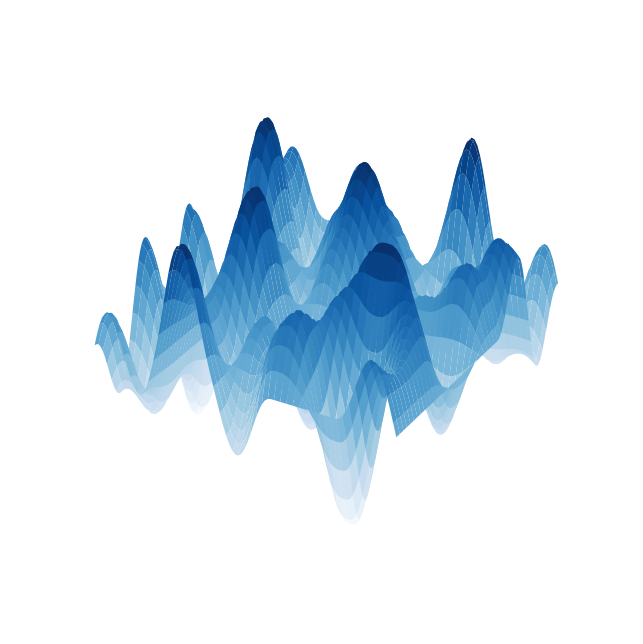

In [491]:
def perlin(x,y,seed=0):
    # permutation table
    np.random.seed(seed)
    random_nums = np.arange(256,dtype=int)
    np.random.shuffle(random_nums)
    # coordinates of the top-left
    i = x.astype(int)
    j = y.astype(int)
    # internal coordinates
    xf = x - i
    yf = y - j
    # fade factors
    u = fade(xf)
    v = fade(yf)
    # noise components
    n00 = gradient(random_nums[random_nums[i]+j],xf,yf)
    n01 = gradient(random_nums[random_nums[i]+j+1],xf,yf-1)
    n11 = gradient(random_nums[random_nums[i+1]+j+1],xf-1,yf-1)
    n10 = gradient(random_nums[random_nums[i+1]+yi],xf-1,yf)
    # combine noises
    x1 = lerp(n00,n10,u)
    x2 = lerp(n01,n11,u) # FIX1: I was using n10 instead of n01
    return lerp(x1,x2,v) # FIX2: I also had to reverse x1 and x2 here

def lerp(a,b,x):
    "linear interpolation"
    return a + x * (b-a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

lin = np.linspace(0,5,100)
x,y = np.meshgrid(lin,lin) # FIX3: I thought I had to invert x and y here but it was a mistake
z = perlin(x,y,seed=0)
fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.axis('off')
ax.plot_surface(x, y, z, cmap = 'Blues')

In [122]:
vector_array_standardised

array([[ 0.22121958,  0.97522402],
       [ 0.91640536,  0.40025144],
       [-0.46364704,  0.88601999],
       [-0.15732467,  0.98754693],
       [ 0.96982532, -0.24380083],
       [ 0.9951305 ,  0.09856616],
       [ 0.15787535,  0.98745905],
       [-0.72049281, -0.69346241],
       [-0.82182058,  0.56974638]])

In [339]:
p = np.arange(256,dtype=int)
np.random.shuffle(p)
p = np.stack([p,p]).flatten()
p

(512,)

### Classic noise part 3 FINAL

'vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])\nrandom_nums = np.arange(256, dtype = int)\nnp.random.shuffle(random_nums)\n'

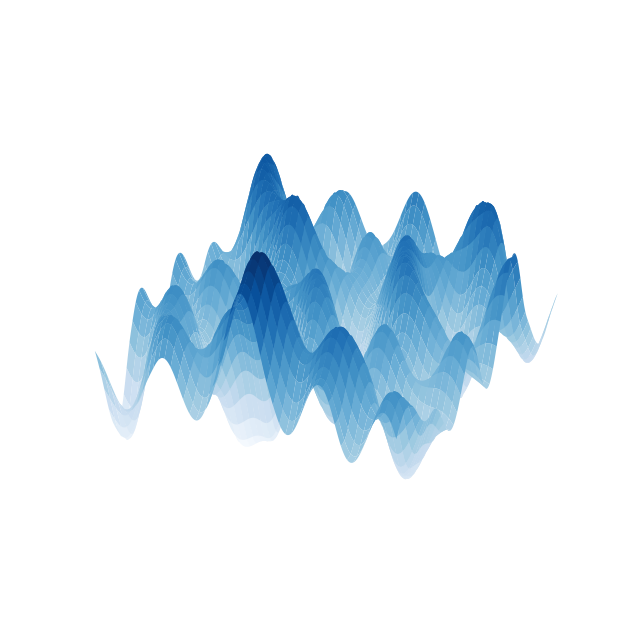

In [504]:
np.random.seed(5)

def blending_function(x):
    return 6 * x**5 - 15 * x**4 + 10 * x**3

def linear_interpolation(a, b, x):
    return a + x * (b - a)

x_integers = 5
y_integers = 5
num_pixels_per_integer = 50
x_pixels = x_integers * num_pixels_per_integer
y_pixels = y_integers * num_pixels_per_integer
x, y = np.mgrid[0:x_pixels, 0:y_pixels] / num_pixels_per_integer

# needs to be int not float!!!
i = x.astype(int)
j = y.astype(int)
u, v = x - i, y - j

# randomising the vectors:
vector_array = np.random.uniform(-1, 1, (x_integers * y_integers, 2))
length_array = ((vector_array[:, 0] ** 2 + vector_array[:, 1] ** 2) ** (1/2)).reshape(x_integers * y_integers, 1)
# all the vectors randomised
# look into this tomorrow !!!! what values do they need to be? how is it randomised?
v_standard = (vector_array / length_array)
random_nums = np.arange(x_pixels * y_pixels, dtype = int)
np.random.shuffle(random_nums)

g00 = v_standard[random_nums[random_nums[i] + j] % (x_integers * y_integers)]
g10 = v_standard[random_nums[random_nums[i + 1] + j] % (x_integers * y_integers)]
g01 = v_standard[random_nums[random_nums[i] + j + 1] % (x_integers * y_integers)]
g11 = v_standard[random_nums[random_nums[i + 1] + j + 1] % (x_integers * y_integers)]

n00 = g00[:, :, 0] * u + g00[:, :, 1] * v
n10 = g10[:, :, 0] * (u - 1) + g10[:, :, 1] * v
n01 = g01[:, :, 0] * u + g01[:, :, 1] * (v - 1)
n11 = g11[:, :, 0] * (u - 1) + g11[:, :, 1] * (v - 1)

f_u, f_v = blending_function(u), blending_function(v)

x1 = linear_interpolation(n00, n10, f_u)
x2 = linear_interpolation(n01, n11, f_u)
z = linear_interpolation(x1, x2, f_v)


fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.axis('off')
ax.plot_surface(x, y, z, cmap = 'Blues')

# garbage linear interpolation function
'''nx0 = np.dot(n00, (1 - f_u)) + np.dot(n10, f_u)
nx1 = np.dot(n01, (1 - f_u)) + np.dot(n11, f_u)
nxy = np.dot(nx0, (1 - f_v)) + np.dot(nx1, f_v)
'''
'''vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
random_nums = np.arange(256, dtype = int)
np.random.shuffle(random_nums)
'''

## Worley Noise:

In [638]:
def calc_rgb_noise(pixel_array, indexes):
    points = np.random.randint(-100,WIDTH+100,(20,2))
    noise_values = np.empty((WIDTH,HEIGHT,3))
    for pixel in pixel_array:
        delta = pixel-points
        distances = np.sqrt(np.sum(delta*delta, axis=1))
        distances = np.sort(distances)
        for i in range(3):
            noise_values[pixel[0]][pixel[1]][i] = distances[indexes[i]]#/(indexes[i]+2)   
    noise_values /= WIDTH//2
    noise_values  *= 255
    for i, val in np.ndenumerate(noise_values):
        if val > 255:
            noise_values[i] = 255
    return noise_values
calc_rgb_noise()

TypeError: calc_rgb_noise() missing 2 required positional arguments: 'pixel_array' and 'indexes'

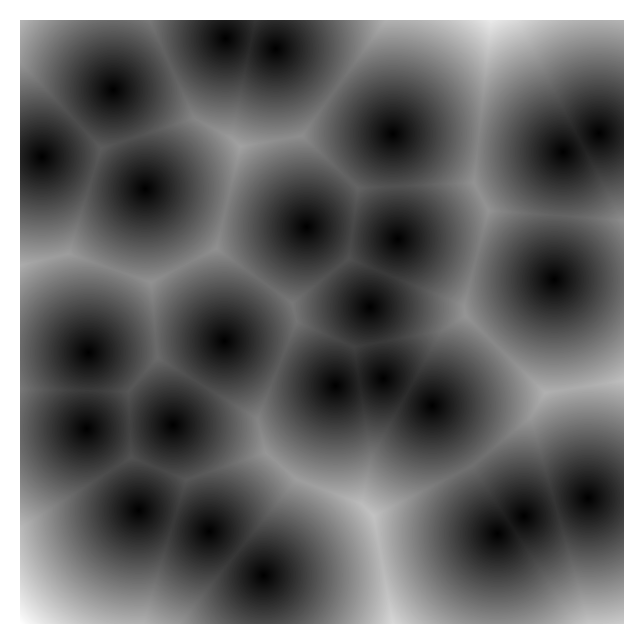

array([[0.115, 0.154],
       [0.226, 0.036],
       [0.55 , 0.113],
       [0.676, 0.11 ],
       [0.811, 0.196],
       [0.03 , 0.34 ],
       [0.279, 0.207],
       [0.531, 0.338],
       [0.67 , 0.253],
       [0.846, 0.313],
       [0.047, 0.423],
       [0.342, 0.474],
       [0.475, 0.579],
       [0.605, 0.522],
       [0.919, 0.403],
       [0.188, 0.617],
       [0.362, 0.625],
       [0.593, 0.601],
       [0.638, 0.682],
       [0.85 , 0.79 ],
       [0.187, 0.958],
       [0.218, 0.899],
       [0.429, 0.884],
       [0.791, 0.94 ],
       [0.821, 0.834]])

In [876]:
pixels = 1000
num_feature_points = 25
x, y = np.mgrid[0:pixels, 0:pixels] / pixels
z = np.ones((pixels, pixels))

# np.random.seed(3)
# we will start with 4 random points (also known as feature points)
# not quite sure yet how to randomise... maybe there is a better method...?
# look at methods to better randomise...
'''feature_points = np.array([[0., 0.],
    [0.2, 0.4],
    [0.6, 0.2],
    [0.8, 0.6]])'''

# we will use some kind of box randomiser (not quite sure what the name is so I gave it one myself)
# we will create a grid within the frame and each feature point is put inside each grid - its position within the grid is completely random
# note that because of this, it is desirable to have square number of feature points
# we have chosen this method of randomisation since we do not want any feature point being too close to another feature point

# num_of_grids is the number of boxes in each axis
num_of_grids = int(num_feature_points**(1/2))

# step is the number of pixels between each grid point
step = int(pixels / num_of_grids)
a = np.array([step * x for x in range(num_of_grids)])
grid_feature_points_x = np.random.randint([a for i in range(num_of_grids)], [a + int(pixels/num_of_grids) for i in range(num_of_grids)]) / pixels
grid_feature_points_y = (np.random.randint([a for i in range(num_of_grids)], [a + int(pixels/num_of_grids) for i in range(num_of_grids)]) / pixels).T
grid_feature_points_x = grid_feature_points_x.reshape(num_of_grids**2, 1)
grid_feature_points_y = grid_feature_points_y.reshape(num_of_grids**2, 1)
grid_feature_points = np.concatenate((grid_feature_points_x, grid_feature_points_y), axis = 1)

# the leftover points can go wherever they want - completely randomised
# preferably, we'd want no leftover points since it could result in feature points being too close together.
num_leftover_points = num_feature_points - num_of_grids**2
leftover_feature_points = np.random.randint(pixels, size = (num_leftover_points, 2)) / pixels

#feature_points include all the feature points
feature_points = np.concatenate((grid_feature_points, leftover_feature_points))

# going through each point, calculating the closest feature point to each point and noting that distance.
for feature_point in feature_points:
    # could define a function that finds the euclidean distance between all the coordinates and the feature point...?
    z = np.fmin(((x - feature_point[0])**2 + (y - feature_point[1])**2)**(1/2), z)
    # what if I use the second closest feature point?

plt.figure(dpi = 200)
plt.imshow(z, cmap = 'gray') # binary, gray
# plt.scatter(feature_points[:, 1] * pixels, feature_points[:, 0] * pixels, linewidths = 1)

plt.axis('off')
plt.show()

'''
fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.set_facecolor('beige')
ax.axis('off')
ax.plot_surface(x, y, z)
'''
feature_points



# Moving Worley Noise:

In [ ]:
# time to create a moving Worley Noise
# each feature point is going to travel in some pattern/ or in a completely random manner

# per unit time each feature point can move in 8 directions
k = 1
random_vectors_possibilities = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]])
for i in range(100):
a = np.random.choice(8, feature_points.shape[0])
random_vectors = random_vectors_possibilities[a]
feature_points = (feature_points + random_vectors / pixels) * k


[[0.41 0.01]
 [0.75 0.2 ]
 [0.04 0.72]
 [0.58 0.61]]
[[0.4  0.  ]
 [0.76 0.19]
 [0.04 0.71]
 [0.59 0.61]]
[[0.39 0.  ]
 [0.75 0.19]
 [0.03 0.7 ]
 [0.6  0.6 ]]
[[ 0.39 -0.01]
 [ 0.76  0.19]
 [ 0.03  0.71]
 [ 0.61  0.61]]
[[0.39 0.  ]
 [0.76 0.18]
 [0.03 0.72]
 [0.61 0.62]]
[[ 0.4  -0.01]
 [ 0.75  0.18]
 [ 0.04  0.73]
 [ 0.6   0.63]]
[[0.4  0.  ]
 [0.74 0.17]
 [0.05 0.73]
 [0.6  0.62]]
[[0.41 0.01]
 [0.73 0.16]
 [0.05 0.74]
 [0.61 0.62]]
[[0.4  0.02]
 [0.73 0.15]
 [0.06 0.73]
 [0.62 0.62]]
[[0.39 0.03]
 [0.74 0.16]
 [0.05 0.74]
 [0.63 0.61]]
[[0.4  0.03]
 [0.73 0.15]
 [0.04 0.74]
 [0.63 0.6 ]]
[[0.41 0.04]
 [0.72 0.14]
 [0.05 0.73]
 [0.63 0.59]]
[[0.4  0.04]
 [0.71 0.14]
 [0.06 0.72]
 [0.63 0.58]]
[[0.41 0.04]
 [0.72 0.14]
 [0.07 0.73]
 [0.63 0.59]]
[[0.4  0.04]
 [0.73 0.13]
 [0.06 0.72]
 [0.64 0.59]]
[[0.41 0.04]
 [0.74 0.12]
 [0.05 0.71]
 [0.63 0.58]]
[[0.41 0.03]
 [0.75 0.13]
 [0.06 0.72]
 [0.64 0.59]]
[[0.4  0.02]
 [0.74 0.12]
 [0.07 0.71]
 [0.64 0.6 ]]
[[0.39 0.03]
 [0.73 0.12]
 [0.

[array([[0.42      , 0.42011903, 0.42047592, ..., 0.26172505, 0.27166155,
         0.28160256],
        [0.41      , 0.41012193, 0.41048752, ..., 0.2607681 , 0.27073973,
         0.28071338],
        [0.4       , 0.40012498, 0.40049969, ..., 0.26019224, 0.27018512,
         0.28017851],
        ...,
        [0.29832868, 0.29206164, 0.28600699, ..., 0.5375872 , 0.54451814,
         0.55154329],
        [0.30610456, 0.3       , 0.29410882, ..., 0.54488531, 0.55172457,
         0.55865911],
        [0.31400637, 0.30805844, 0.30232433, ..., 0.55226805, 0.55901699,
         0.56586217]]),
 array([[0.41012193, 0.41      , 0.41012193, ..., 0.25317978, 0.26305893,
         0.27294688],
        [0.40012498, 0.4       , 0.40012498, ..., 0.25179357, 0.26172505,
         0.27166155],
        [0.39012818, 0.39      , 0.39012818, ..., 0.25079872, 0.2607681 ,
         0.27073973],
        ...,
        [0.29732137, 0.29068884, 0.28425341, ..., 0.53075418, 0.5375872 ,
         0.54451814],
        [0.3

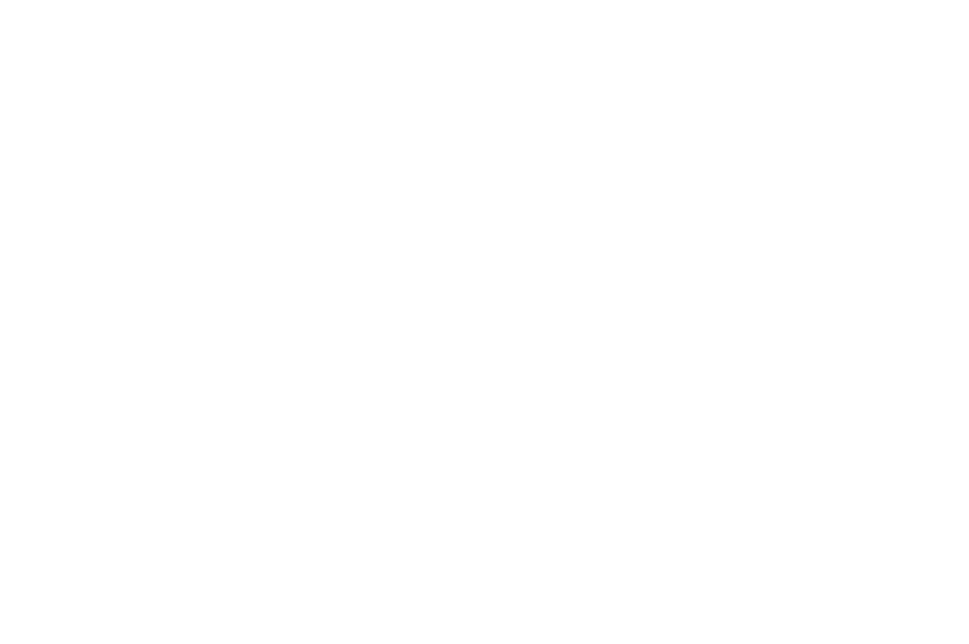

In [875]:


import matplotlib.animation as animation

pixels = 100
num_feature_points = 4
x, y = np.mgrid[0:pixels, 0:pixels] / pixels
z = np.ones((pixels, pixels))
np.random.seed(3)
# we will use some kind of box randomiser (not quite sure what the name is so I gave it one myself)
# we will create a grid within the frame and each feature point is put inside each grid - its position within the grid is completely random
# note that because of this, it is desirable to have square number of feature points
# we have chosen this method of randomisation since we do not want any feature point being too close to another feature point

# num_of_grids is the number of boxes in each axis
num_of_grids = int(num_feature_points**(1/2))

# step is the number of pixels between each grid point
step = int(pixels / num_of_grids)
a = np.array([step * x for x in range(num_of_grids)])
grid_feature_points_x = np.random.randint([a for i in range(num_of_grids)], [a + int(pixels/num_of_grids) for i in range(num_of_grids)]) / pixels
grid_feature_points_y = (np.random.randint([a for i in range(num_of_grids)], [a + int(pixels/num_of_grids) for i in range(num_of_grids)]) / pixels).T
grid_feature_points_x = grid_feature_points_x.reshape(num_of_grids**2, 1)
grid_feature_points_y = grid_feature_points_y.reshape(num_of_grids**2, 1)
grid_feature_points = np.concatenate((grid_feature_points_x, grid_feature_points_y), axis = 1)

# the leftover points can go wherever they want - completely randomised
# preferably, we'd want no leftover points since it could result in feature points being too close together.
num_leftover_points = num_feature_points - num_of_grids**2
leftover_feature_points = np.random.randint(pixels, size = (num_leftover_points, 2)) / pixels

#feature_points include all the feature points
feature_points = np.concatenate((grid_feature_points, leftover_feature_points))

# k represents how much the feature point moves
k = 10
random_vectors_possibilities = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]])

# where we store each final z
test = []

ims = []
fig, ax = plt.subplots(dpi = 200)
ax.axis('off')

for i in range(100):
    # going through each point, calculating the closest feature point to each point and noting that distance.
    for feature_point in feature_points:
        # could define a function that finds the euclidean distance between all the coordinates and the feature point...?
        z = np.fmin(((x - feature_point[0])**2 + (y - feature_point[1])**2)**(1/2), z)

    # adding the finished distance values to ims  
    test.append(z)

    # changing the value of the feature points - using brownian motion
    a = np.random.choice(8, feature_points.shape[0])
    random_vectors = random_vectors_possibilities[a] / pixels
    feature_points = feature_points + random_vectors
    # possible issue: the feature point may not be within the frame
    '''feature_points[feature_points < 0] = 0
    feature_points[]'''
    print(feature_points)

'''for i in range(100):
    im = ax.imshow(test[i], animated = True, cmap = 'gray')
    ims.append([im])
'''
# binary, gray
# plt.scatter(feature_points[:, 1] * pixels, feature_points[:, 0] * pixels, linewidths = 1)

'''anim = animation.ArtistAnimation(fig, ims, interval = 50, blit = True, repeat_delay = 100)
plt.show();'''

test

In [860]:
z

array([[0.56977539, 0.56900351, 0.56823235, ..., 0.25235293, 0.25251733,
        0.25268558],
       [0.56914058, 0.56836784, 0.56759581, ..., 0.25136627, 0.25153131,
        0.25170022],
       [0.56850682, 0.56773321, 0.56696032, ..., 0.25037971, 0.25054541,
        0.25071498],
       ...,
       [0.42960563, 0.42901049, 0.42841685, ..., 0.42703161, 0.42754766,
        0.42806542],
       [0.43040911, 0.42981508, 0.42922255, ..., 0.427889  , 0.42840401,
        0.42892074],
       [0.4312134 , 0.43062048, 0.43002907, ..., 0.42874701, 0.42926099,
        0.42977669]])

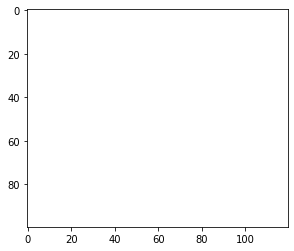

In [868]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
    repeat_delay=1000)

#ani.save('dynamic_images.mp4')


plt.show()